In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")

In [3]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [4]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  NACCAGEB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.7499454404198622, pvalue=0.18621373445502087)
Test: f_t, p_value_t -5.611E+00 2.666E-08
ANOVA: f, p_value: 3.148E+01 2.666E-08
--------------------------------------------------------------------------------


Group1:  [79 82 58 76 59 67 77 73 86 60 74 76 71 50 80 61 83 64 61 29 72 72 60 89
 68 83 61 75 66 85 65 63 91 72 71 70 59 76 57 71 71 47 78 67 65 75 57 64
 61 88 65 75 69 86 58 85 57 82 73 70 59 70 74 56 59 63 82 73 76 72 58 54
 56 70 77 59 68 88 69 86 80 59 71 67 47 57 73 74 60 65 66 74 72 93 67 76
 66 75 75 78 71 79 52 80 59 79 63 60 77 62 57 53 80 65 48 28 73 77 63 75
 66 65 67 67 68 64 68 76 66 78 72 62 63 69 56 73 77 87 70 92 61 86 60 68
 73 60 70 86 67 64 59 78 28 82 68 87 56 68 66 55 63 79 78 56 69 90 75 57
 79 55 68 58 63 75 66 78 59 68 74 76 60 68 80 70 57 82 60 80 67 66 54 75
 55 65 49 56 74 53 78 69 76 69 76 70 79 73 64 73 76 52 83 64 

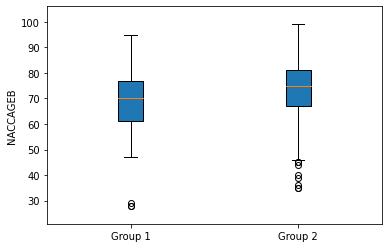

************************************************************************************************************************




Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=19.889390494833776, pvalue=9.223671035874065e-06)
Test: f_t, p_value_t 1.472E+01 1.116E-42
ANOVA: f, p_value: 1.923E+02 1.116E-42
--------------------------------------------------------------------------------


Group1:  [8 1 8 8 8 8 8 8 1 8 1 1 8 8 8 1 8 8 1 1 8 8 8 8 8 1 8 8 8 8 8 8 1 1 1 8 8
 8 8 8 8 8 8 8 1 8 8 8 8 1 8 1 8 1 8 8 8 8 1 1 8 8 1 8 8 8 8 8 8 1 8 8 8 1
 8 8 1 8 8 8 8 8 8 8 8 8 0 8 8 8 1 8 8 8 8 8 8 8 8 1 8 8 8 1 1 8 8 8 8 8 8
 8 1 8 8 8 8 1 8 8 8 8 8 8 1 8 8 8 8 1 1 8 8 1 8 8 8 8 8 8 8 8 8 1 1 8 1 8
 1 8 8 8 1 8 1 8 8 8 1 8 8 8 8 8 8 1 8 8 8 8 1 8 1 1 8 8 8 8 8 8 8 8 1 1 1
 8 8 8 8 1 8 8 8 8 8 8 1 8 1 1 1 8 8 1 8 1 8 8 1 1 8 8 1 8 1 8 8 8 8 1 8 8
 8 8 8 8 8 8 8 8 1 8 8 8 1 8 8 8 8 8 8 8 1 8 8 8 0 8 8 8 8 1 8 8 8 8 

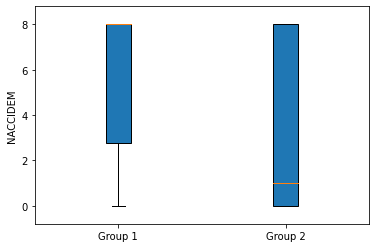

************************************************************************************************************************




Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.32684732487011947, pvalue=0.5676616783661154)
Test: f_t, p_value_t -6.100E+00 1.566E-09
ANOVA: f, p_value: 3.721E+01 1.566E-09
--------------------------------------------------------------------------------


Group1:  [84 92 59 81 60 68 80 75 93 61 81 80 74 51 83 65 89 70 73 34 73 76 61 93
 70 88 63 76 68 89 70 66 97 83 81 75 63 81 59 76 76 51 81 69 67 78 59 68
 64 93 72 83 71 90 66 88 58 86 82 80 61 77 79 60 61 69 86 74 78 76 63 56
 57 78 80 61 71 90 75 87 83 66 73 68 51 59 86 76 62 67 71 78 73 94 69 80
 76 81 80 82 74 80 56 87 64 83 64 61 79 66 60 54 84 69 49 35 78 87 64 81
 68 66 69 68 72 66 70 84 70 88 78 67 68 79 60 76 81 91 76 95 65 89 67 75
 85 65 74 87 69 71 62 79 38 85 71 89 57 72 74 56 65 81 83 59 70 100 79 60
 80 61 79

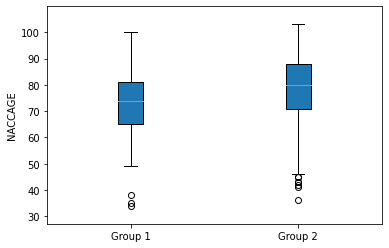

************************************************************************************************************************




Feature:  NACCDAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.09955455499961567, pvalue=0.7524367119920685)
Test: f_t, p_value_t -5.266E+00 1.736E-07
ANOVA: f, p_value: 2.773E+01 1.736E-07
--------------------------------------------------------------------------------


Group1:  [89 93 61 81 69 71 85 79 95 65 83 84 80 59 85 65 91 72 73 41 76 78 71 94
 73 92 72 79 73 94 75 74 98 87 83 77 64 85 61 83 78 55 84 72 70 84 63 75
 70 94 72 87 76 91 68 92 63 88 85 82 65 78 83 62 66 72 88 77 80 78 64 61
 62 78 84 64 73 95 79 91 89 67 76 72 54 64 86 78 67 71 72 82 78 97 71 85
 78 85 81 86 79 85 58 89 65 85 66 63 80 70 64 61 85 70 50 35 82 90 67 84
 74 68 74 70 76 70 75 84 72 91 82 74 68 81 65 77 85 96 82 101 67 92 70 82
 86 69 74 88 70 76 65 81 39 87 77 90 59 76 77 62 67 82 89 62 74 102 86 66
 91 62 

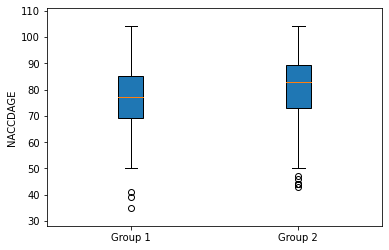

************************************************************************************************************************




Feature:  COMMUN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=159.0710118719836, pvalue=9.616685255650891e-34)
Test: f_t, p_value_t 3.913E+01 9.931E-193
ANOVA: f, p_value: 1.102E+03 9.931E-193
--------------------------------------------------------------------------------


Group1:  [2.0 2.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0
 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0
 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0
 2.0 2.0 

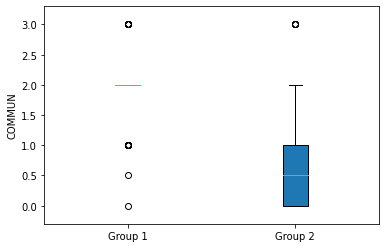

************************************************************************************************************************




Feature:  HOMEHOBB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=117.56951714999327, pvalue=7.410255652303591e-26)
Test: f_t, p_value_t 3.805E+01 8.473E-184
ANOVA: f, p_value: 1.081E+03 8.473E-184
--------------------------------------------------------------------------------


Group1:  [2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 3.0 3.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 3.0
 2.0 3.0 1.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 2.0 1.0 3.0 3.0 3.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 3.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0
 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0
 2.0 2

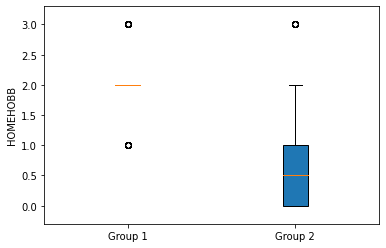

************************************************************************************************************************




Feature:  NPFTDT5


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.347398634048833, pvalue=0.12583754421374074)
Test: f_t, p_value_t -1.532E+00 1.258E-01
ANOVA: f, p_value: 2.347E+00 1.258E-01
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0

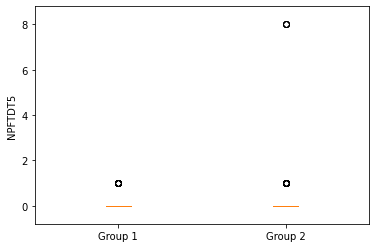

************************************************************************************************************************




Feature:  ORIENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.9916474283162309, pvalue=0.3196030424587296)
Test: f_t, p_value_t 3.175E+01 8.693E-150
ANOVA: f, p_value: 1.008E+03 8.693E-150
--------------------------------------------------------------------------------


Group1:  [2.0 2.0 2.0 1.0 1.0 2.0 1.0 1.0 1.0 2.0 1.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0
 3.0 0.5 2.0 2.0 2.0 1.0 1.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0
 2.0 1.0 1.0 2.0 1.0 1.0 2.0 2.0 2.0 0.5 2.0 2.0 1.0 1.0 1.0 2.0 1.0 2.0
 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 0.5 0.5 2.0 2.0 1.0
 2.0 2.0 2.0 2.0 1.0 2.0 2.0 1.0 1.0 1.0 2.0 1.0 0.0 2.0 1.0 1.0 0.5 2.0
 1.0 1.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 1.0
 2.0 1.0 2.0 2.0 2.0 3.0 2.0 1.0 2.0 0.5 2.0 2.0 2.0 2.0 1.0 1.0 2.0 2.0
 2.0 1.0 1.

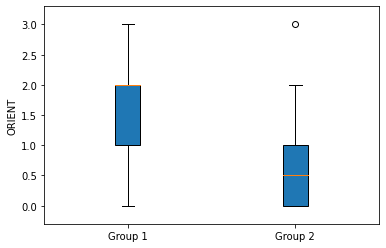

************************************************************************************************************************




Feature:  DECIN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=24.107326551839584, pvalue=1.0785311726323236e-06)
Test: f_t, p_value_t 2.126E+00 3.382E-02
ANOVA: f, p_value: 3.377E+00 3.382E-02
--------------------------------------------------------------------------------


Group1:  [1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

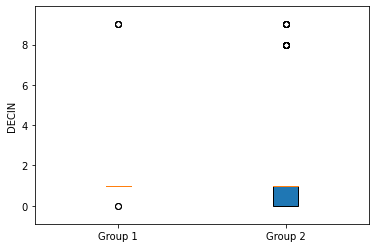

************************************************************************************************************************




Feature:  JUDGMENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.4868019584932206, pvalue=0.48553441469490355)
Test: f_t, p_value_t 2.867E+01 1.639E-129
ANOVA: f, p_value: 8.218E+02 1.639E-129
--------------------------------------------------------------------------------


Group1:  [3.0 3.0 2.0 1.0 2.0 2.0 1.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 3.0
 3.0 1.0 2.0 2.0 3.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 1.0 2.0 2.0 1.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 1.0 1.0 3.0 2.0 2.0 3.0 2.0 3.0 2.0 3.0 2.0 1.0 2.0
 1.0 2.0 1.0 1.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 1.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0
 1.0 2.0 2.0 1.0 2.0 1.0 1.0 2.0 1.0 2.0 2.0 1.0 2.0 1.0 1.0 1.0 2.0 2.0
 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 1.0 1.0 2.0 2.0 2.0 3.0 1.0 2.0 1.0 2.0
 2.0 1.0

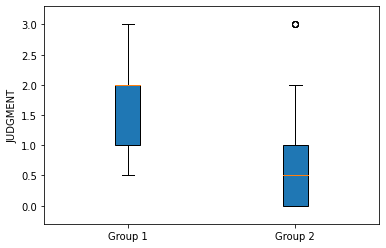

************************************************************************************************************************






In [5]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    
    bar_figure(group1_data,group2_data,feature_name)
    
    print("*"*120)
    print("\n\n\n")